<a href="https://colab.research.google.com/github/talha469/Password-Strenght/blob/main/Password_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [ ]:
data = pd.read_csv('/content/password_data.csv',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
data['strength'].unique()


array([1, 2, 0])

In [ ]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [ ]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

password    0
strength    0
dtype: int64

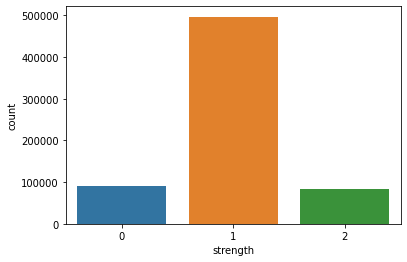

In [ ]:
sns.countplot(data['strength'])

In [ ]:
passwordData = np.array(data)
import random
random.shuffle(passwordData) 

In [ ]:
passwordData

array([['kzde5577', 1],
       ['kino3434', 1],
       ['kzde5577', 1],
       ...,
       ['rhLiHKjk1NQUhisY', 2],
       ['2LjgssDQzNgLEnIK', 2],
       ['anopig140', 1]], dtype=object)

In [ ]:
x = [labels[0] for labels in passwordData] #independent features password
y = [labels[1] for labels in passwordData] #dependent features strength

In [ ]:
def wordsIntoCharacters(inputs):
  character = []
  for i in inputs:
    character.append(i)
  return character

In [ ]:
wordsIntoCharacters('Talha')

['T', 'a', 'l', 'h', 'a']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer = wordsIntoCharacters)
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function wordsIntoCharacters at 0x7f2f9bdf93b0>,
                use_idf=True, vocabulary=None)

In [ ]:
X = vectorizer.fit_transform(x)


In [ ]:
X.shape

(669639, 126)

In [ ]:

vectorizer.get_feature_names()

In [ ]:
firsts_doc = X[0] #picking 1st row of data
firsts_doc


<1x126 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
firsts_doc.T.todense() #converting for visualization

In [ ]:
df = pd.DataFrame(firsts_doc.T.todense(),columns=['TF-IDF'] )
df

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
x_train.shape

(535711, 126)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0, multi_class='multinomial')
LR.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
dt = np.array(['abscd%$*V'])
prediction = vectorizer.transform(dt)
LR.predict(prediction)

array([2])

In [ ]:
y_prediction = LR.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_prediction)
print(cm)
accuracy = accuracy_score(y_test,y_prediction)
print(accuracy)

[[ 5320 12797    13]
 [ 3951 92584  2510]
 [   35  5248 11470]]
0.8166626844274536


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.57      0.29      0.39     18130
           1       0.84      0.93      0.88     99045
           2       0.82      0.68      0.75     16753

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928



In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV

import numpy as np
n_estimators = [int(x) for x in [100,200]]
max_depth = [int(x) for x in [5,10,15]]

randomGrid = {
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth': max_depth,
    'min_samples_split':[5,10],
}

rf_searchcv= RandomizedSearchCV(estimator = rf, param_distributions = randomGrid, cv=3, verbose=2,n_jobs=-1)

rf_searchcv.fit(x_train,y_train)

test_result= rf_searchcv.predict(x_test)

sns.distplot(y_test - test_result)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
